In [150]:
#191180008 TUĞBA AKIN

In [151]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
from graphviz import Source
from graphviz import Digraph
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report as clf_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import graphviz

In [152]:
#Q1
from sklearn.datasets import load_iris
iris = load_iris()
# Access the data and target variables

In [153]:
# Create a DataFrame from the iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add a new column to the DataFrame with the target values
df['target'] = iris.target


In [154]:
# build a Random Forest Classifier which consists of 10 trees to predict the species of Iris Flowers. Bulding that using gini index criterion
clf = RandomForestClassifier(criterion='gini', n_estimators=10)
#fitting model with the training data
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [155]:
#randomizing data
df = df.sample(frac=1)
#split the data into training and test set.  %75 of the data for training and the remaining %25 for testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25)

In [156]:
#train the model using the training data.
y_pred = clf.predict(X_test)


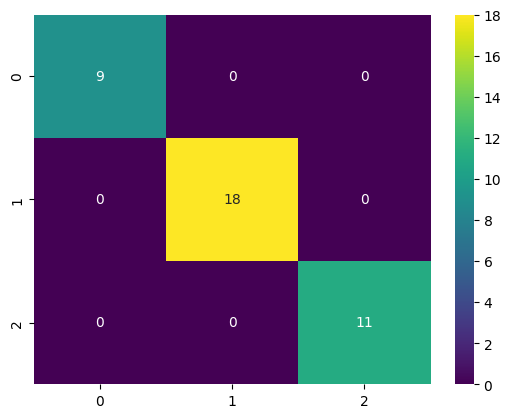

In [157]:
#Create a confusion matrix for predictions with seaborn
confm = confusion_matrix(y_test, y_pred)

#plot the confusion matrix with seaborn
sns.heatmap(confm, annot=True, cmap='viridis', fmt='g')
plt.show()


In [158]:
#create a confusion matrix
print('\nCONFUSION MATRIX:\n',confusion_matrix(y_test,y_pred))


CONFUSION MATRIX:
 [[ 9  0  0]
 [ 0 18  0]
 [ 0  0 11]]


In [159]:
#Q2
#use the model you have trained to predict the species of each flower in the test set.
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
# Print the predictions
print(y_pred)

[2 0 2 1 2 2 0 0 2 1 1 2 0 2 0 2 2 2 0 1 1 1 2 1 1 2 1 2 1 1 0 1 0 2 0 1 1
 1]


In [160]:
#report the accuracy, precision, recall and f-1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:}')
print(f'Precision: {precision:}')
print(f'Recall: {recall:}')
print(f'f-1 Score: {f1:}')


Accuracy: 0.9210526315789473
Precision: 0.93796992481203
Recall: 0.9210526315789473
f-1 Score: 0.9222009569377991


In [161]:
#Q3
#shuffle the rows of the DataFrame randomly
df = df.sample(frac=1)


In [162]:
#choose random tree in the forest
estimator = random.choice(clf.estimators_) 


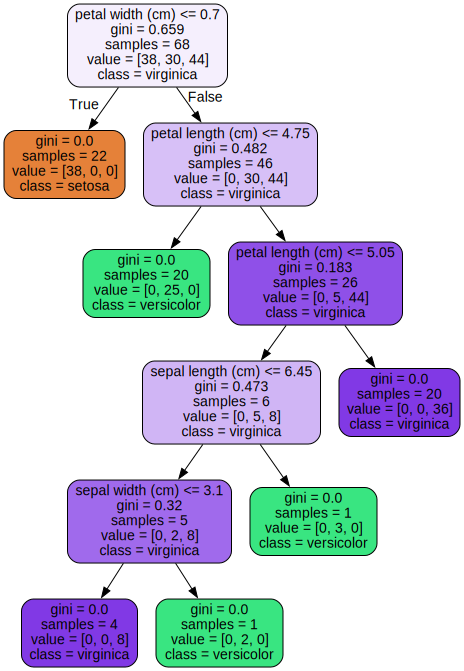

In [149]:
#extract a single tree from the Random Forest. Picking this tree at randomly, it should be one
#of the 10 trees used to build the Random Forest Classifier. using Graphviz library to visualize this tree.

dot_data = export_graphviz(estimator, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
graph = Source(dot_data)
graph